# pyfeyn2

## Rendering Feynman diagrams

There already exist plenty of tools to draw feynman diagrams in various environments:

* LaTeX:
    * [tikz-feynman](https://github.com/JP-Ellis/tikz-feynman)
    * [feynMF](https://ctan.org/pkg/feynmf?lang=en)
* Mathematica:
    * [feynarts](https://feynarts.de/)
    * [feynarts](https://feynarts.de/)
* C++: [feyndiagram](http://www.feyndiagram.com/)
* Java: [JaxoDraw](https://jaxodraw.sourceforge.io/)
* Python:
    * [qgraf-xml-drawer](https://github.com/ndeutschmann/qgraf-xml-drawer)
    * [feynman](https://github.com/GkAntonius/feynman)
    * [pyfeyn](https://pyfeyn.hepforge.org/)
* ...

## Why python?

* Easy to use and maintain
* Rich ecosystem (scikit-hep)
* Easy to glue different tools together
* Free (compared to Mathematica)

## feynml

However most of them are not directly computer-readable.
The original [feynml](https://feynml.hepforge.org/) project aimed to change that, but has not received updates for some while.
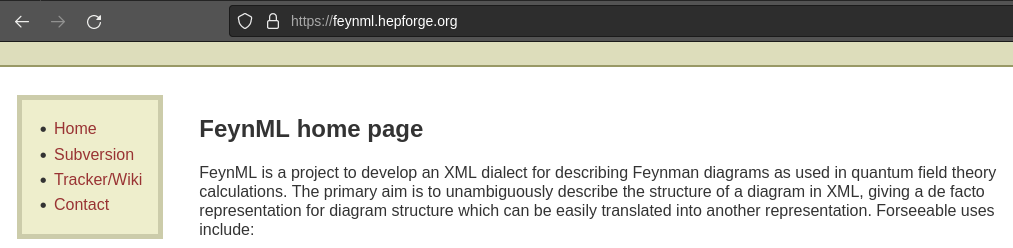

Such a standard, similar to LHE, is very reasonable for communicating Feynman diagrams (Computer/Person <-> Computer/Person).
The same topological Feynman diagram can be rendered in many different ways. 
That is why in the updated feynml, similarly to HTML+CSS, the physical/topological content is separated from the stylized representation. 

But let's first focus on pyfeyn and creating some diagrams.

## pyfeyn2 - What's new

* Different render engines:
    * matplotlib
    * PyX
    * tikz
    * ASCII
    * Unicode
    * feynmp
    * DOT language
* Focus on modularity, enables interfaces to:
    * pyLHE
    * pyHEPMC
    * UFO (Universal FeynRules Object)
    * qgraf
    * form
    * ...

In [1]:
import pyfeyn2

In [2]:
from matplotlib import pyplot as plt

from feynml.feynmandiagram import FeynmanDiagram
from feynml.leg import Leg
from feynml.propagator import Propagator
from feynml.vertex import Vertex
from pyfeyn2.render.all import AllRender, renders
from pyfeyn2.render.pyx.pyxrender import PyxRender
from pyfeyn2.render.mpl.feynmanrender import FeynmanRender
from smpl_io import io

## Render a simple diagram

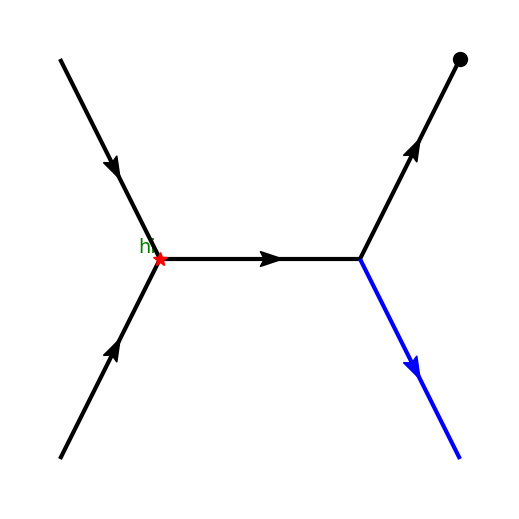

In [3]:
    fd = FeynmanDiagram()
    v1 = Vertex("v1").with_xy(-1, 0).with_label("hi").with_style("label-color: green; color: red; symbol : star")
    v2 = Vertex("v2").with_xy(1, 0)
    p1 = Propagator("p1").connect(v1, v2).with_type("fermion").with_style("momentum-arrow: true; momentum-arrow-sense: -1")
    l1 = Leg("l1").with_target(v1).with_xy(-2, 1).with_type("fermion").with_incoming()
    l2 = Leg("l2").with_target(v1).with_xy(-2, -1).with_type("fermion").with_incoming()
    l3 = Leg("l3").with_target(v2).with_xy(2, 1).with_type("fermion").with_outgoing().with_style("symbol : blob")
    l4 = Leg("l4").with_target(v2).with_xy(2, -1).with_type("fermion").with_outgoing().with_style("color: blue;")
    p1.with_source(v1)
    p1.with_target(v2)
    fd.propagators.append(p1)
    fd.vertices.extend([v1, v2])
    fd.legs.extend([l1, l2, l3, l4])
    fr = FeynmanRender(fd)
    fr.render(show=True)

## Latex Output

## ASCII Ouput

Allows to graphically comment code that contains feynmandiagrams, instead of soley cryptic names like "qqb_eeb_box_qAAe"

## XML ouput

## CSS customization